### Training setup play

In [2]:
import pickle

## Robot Data Analysis

Got 60 second's worth of frames and radar data from the church real test (Varun) - the case where he had 120 bpm HR. Now - look at the pickle file and see how it looks (the rf.pkl file in Equipleth data was a weird 5 element tuple; with the first element being a 2D array. Just need to figure out how the rf data differs; and how the rf_ppg calculation might differ. After that it's just FFTs being estimted and pushed into the fusion model).

In [23]:
import pickle

# Open the file in binary read mode
with open('/Users/jamesemilian/triage/equipleth/experiment_data/M24-04_60s_sample/radar_data_pickle.pkl', 'rb') as file:
    chiron_radar_data = pickle.load(file)


In [24]:
chiron_radar_data

[array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dt

In [25]:
import numpy as np
chiron_radar_data = np.array(chiron_radar_data)
chiron_radar_data.shape

(2595, 1024)

Here is the RadarDataFrame defn:  
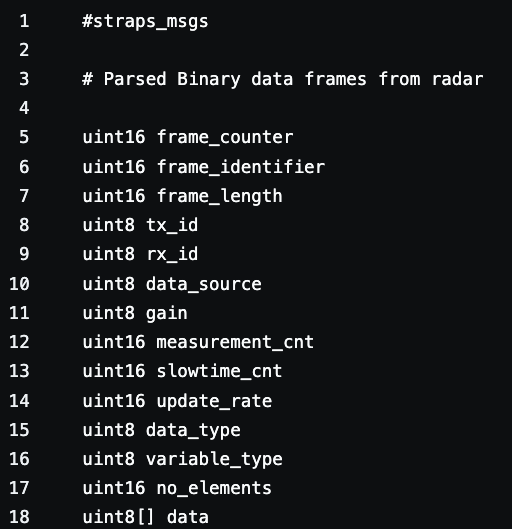

Note, that was a sample of data from 60 seconds. To slice data worth 30 sec, just slice along the first axis:

In [26]:
chiron_radar_data_30s = chiron_radar_data[:1300, :]
chiron_radar_data_30s.shape

(1300, 1024)

Now; how does the data look for the data in the pickle file in Equipleth, corresponding to 30s of data from a single subject?

In [18]:
import pickle

# Open the file in binary read mode
with open('/Users/jamesemilian/triage/equipleth/Camera_77GHzRadar_Plethysmography_2/rf_files/1_1/rf.pkl', 'rb') as file:
    ep_radar_data = pickle.load(file)

In [ ]:
len(ep_radar_data)

In [20]:
np.array(ep_radar_data[0]).shape

(5110, 728)

In [21]:
np.array(ep_radar_data[1]).shape, np.array(ep_radar_data[2]).shape, np.array(ep_radar_data[3]).shape, np.array(ep_radar_data[4]).shape

((5110,), (5110,), (), ())

In [22]:
ep_radar_data[3], ep_radar_data[4]

('2021-12-04T00:58:02.318791Z', '2021-12-04T00:58:32.323084Z')

Ok, so these are just timestamps of when the recording was started and ended. `ep_radar_data[0]` should have the 'frame data', which is the actual radar data. What are in `[1]` and `[2]` dimensions?

### EP vs Chiron data check

Time to check the interleaving of data (the RF read is mentioned to add zeros alternatively to samples in the )

In [35]:
chiron_radar_data_30s.shape

(1300, 1024)

In [38]:
chiron_radar_data_30s[0].shape
#shape of one raw frame (one message)

(1024,)

In [36]:
np.unique(chiron_radar_data_30s[0]), np.unique(chiron_radar_data_30s[1])

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  38,  40,  41,  42,  43,  46,  47,  48,  49,  50,  51,  53,  54,  55,  56,  57,  58,  59,  61,  62,  63,  66,  67,  68,  70,  73,  74,  76,
         77,  80,  81,  82,  84,  86,  88,  90,  93,  95,  96,  98,  99, 100, 101, 102, 104, 105, 106, 108, 109, 110, 112, 113, 114, 116, 117, 121, 122, 124, 125, 126, 128, 129, 131, 132, 133, 134, 135, 136, 137, 138, 142, 143, 145, 146, 147, 148, 149, 151, 153, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
        168, 169, 173, 174, 175, 177, 178, 184, 185, 187, 188, 190, 191, 192, 193, 194, 195, 196, 197, 200, 201, 202, 204, 205, 206, 207, 209, 210, 211, 212, 213, 217, 218, 219, 220, 221, 223, 226, 227, 229, 230, 231, 232, 233, 234, 235, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253,
        254, 255], dtype=uint8)

In [39]:
np.mean(chiron_radar_data_30s[0]), np.mean(chiron_radar_data_30s[1])

(91.1494140625, 114.9365234375)

In [42]:
np.mean(chiron_radar_data_30s, axis=1), np.mean(chiron_radar_data_30s, axis=1).shape

(array([ 91.14941406, 114.93652344,  91.61816406, 115.20410156,  91.        , 115.12988281,  91.1953125 , 116.84863281,  91.19335938, 115.06640625,  91.25390625, 115.14746094,  91.18359375, 115.32910156,  91.37304688, 115.53808594,  90.99609375, 115.28808594,  91.39941406, 115.22851562,  91.05566406, 115.21484375,
         91.42480469, 115.60839844,  91.05566406, 115.33789062,  91.24316406, 115.40039062,  91.00097656, 115.17773438,  91.32519531, 115.34277344,  91.55175781, 115.64941406,  91.62695312, 115.27441406,  91.17285156, 116.04296875,  91.40039062, 115.32519531,  91.24511719, 115.36230469,  91.53125   , 115.21582031,
         91.36035156, 115.54785156,  91.04785156, 115.26074219,  91.33007812, 117.31445312,  91.62597656, 115.3515625 ,  91.9375    , 116.390625  ,  91.65136719, 116.14355469,  91.45898438, 115.53027344,  91.54101562, 115.68945312,  91.59179688, 114.92871094,  91.45800781, 123.97460938,  91.17285156, 131.421875  ,
         91.125     , 127.67285156,  91.02441406, 13

Not sure what I'm looking at; just looking at changes in mean values over the time axis. 

In [40]:
# import matplotlib as plt
# plt.plot(idx, chiron_radar_data_30s[0], label='RGB FFT')

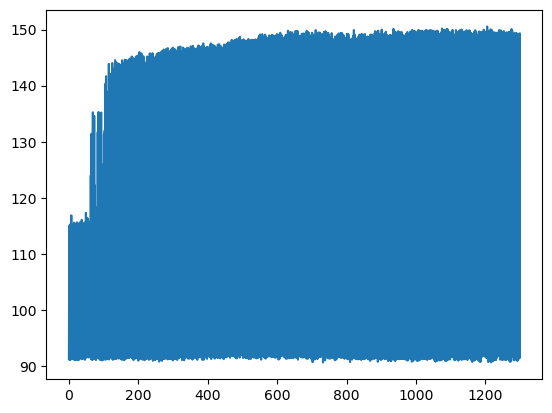

In [57]:
import matplotlib.pyplot as plt
idx = np.arange(0, 1300)
plt.plot(idx, np.mean(chiron_radar_data_30s, axis=1))

1300 values for 30s; that's about 43 frames/sec. reshape like that and plot.

In [63]:
chiron_means = np.mean(chiron_radar_data_30s, axis=1)
chiron_means_reshap = np.reshape(chiron_means, (-1, 26))
chiron_means_reshap.shape

(50, 26)

(Tough to reshape into an array with a 30 dimn; but this should give a rough idea):

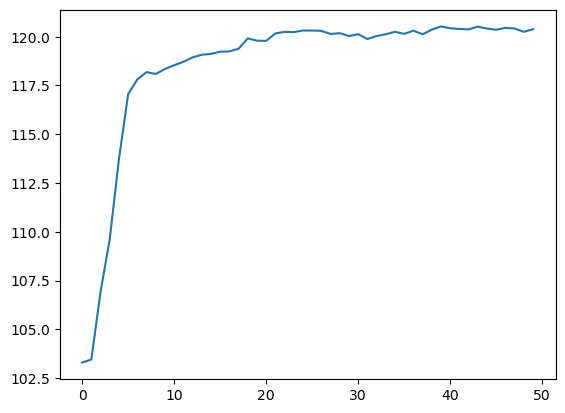

In [64]:
import matplotlib.pyplot as plt
idx = np.arange(0, 50)
plt.plot(idx, np.mean(chiron_means_reshap, axis=1))

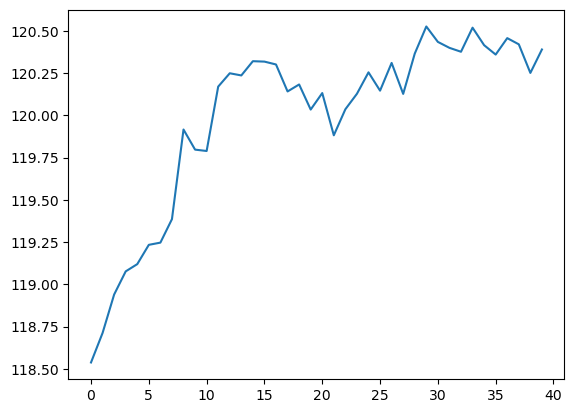

In [71]:
import matplotlib.pyplot as plt
idx = np.arange(0, 40)
plt.plot(idx, np.mean(chiron_means_reshap[10:], axis=1))

Above represents about 24 sec of data. Looks ok? Not sure - and this is also not simply respiration data; it is hard to judge.

Thus far, I don't see any interleaving of zeros in the raw data of Chiron. Take a quick look at EP; have to move to actual inference updates ASAP.

In [46]:
ep_radar_data_np = np.array(ep_radar_data[0])

In [47]:
ep_radar_data_np.shape

(5110, 728)

In [49]:
np.unique(ep_radar_data_np[0]), np.unique(ep_radar_data_np[1])

(array([    0,     1,     2,     5,     9,    11,    12,    14,    17,    18,    19,    21,    22,    23,    26,    27,    28,    33,    34,    35,    36,    39,    43,    45,    47,    49,    50,    52,    56,    58,    60,    61,    63,    64,    69,    70,    72,    73,    77,    84,    85,    86,    88,   105,   106,
          107,   110,   114,   115,   117,   122,   129,   131,   138,   140,   142,   144,   145,   146,   150,   151,   152,   154,   156,   160,   161,   162,   167,   169,   172,   176,   179,   186,   191,   203,   205,   211,   213,   214,   221,   224,   226,   229,   231,   240,   242,   243,   248,   250,   251,
          253,   254,   260,   261,   269,   275,   281,   283,   284,   288,   290,   291,   292,   298,   300,   301,   303,   309,   310,   311,   314,   321,   322,   326,   328,   329,   334,   336,   338,   345,   346,   349,   350,   354,   357,   359,   362,   363,   369,   370,   372,   375,   386,   393,   394,
          395,   405,   407,   

In [50]:
np.mean(ep_radar_data_np[0]), np.mean(ep_radar_data_np[1])

(15050.425824175823, 15842.697802197803)

In [52]:
np.mean(ep_radar_data_np, axis=1), np.mean(ep_radar_data_np, axis=1).shape

(array([15050.42582418, 15842.6978022 , 15588.67445055, 15042.86401099, 16468.74038462, 15585.17032967, 15935.48901099, 15047.42994505, 15930.03846154, 15493.11538462, 15136.98901099, 15301.4532967 , 15139.51648352, 15932.72527473, 15579.54807692, 16109.68131868, 15136.0782967 , 14152.90247253, 16469.9478022 ,
        15587.56593407, 16475.26236264, 16568.39835165, 15939.68269231, 15133.50686813, 13435.62637363, 15925.48626374, 14061.70879121, 16383.75549451, 16923.93818681, 17193.0206044 , 16840.62087912, 15318.89423077, 16829.76236264, 16571.08516484, 16116.97115385, 17011.3543956 , 15584.06456044, 16833.42032967,
        14779.45741758, 17009.40247253, 15321.57417582, 14773.14835165, 16291.38049451, 15940.10576923, 16206.14972527, 14856.7706044 , 17549.43543956, 15492.96016484, 16294.03708791, 14146.02472527, 17817.28571429, 15585.45054945, 14320.80357143, 17818.03983516, 15136.0206044 , 16468.86950549, 14595.40934066,
        17279.24038462, 14956.52197802, 14502.28846154, 17726.63

Again, just looking at changes in mean values over the time axis. 

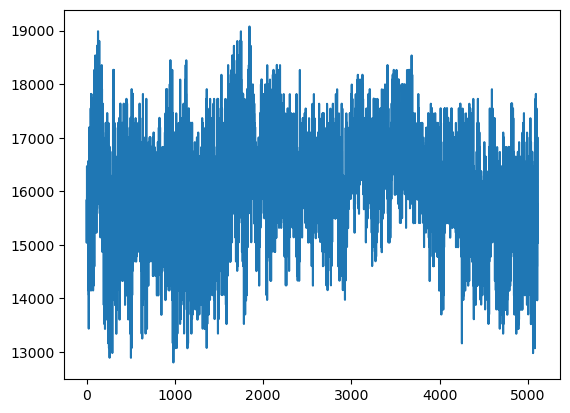

In [56]:
import matplotlib.pyplot as plt
idx = np.arange(0, 5110)
plt.plot(idx, np.mean(ep_radar_data_np, axis=1))

In [55]:
np.mean(np.mean(ep_radar_data_np, axis=1))

15968.482199845166

Can smooth out the graph by taking a mean of samples over each 0.5 sec approx and plotting them to see.

In [65]:
ep_means = np.mean(ep_radar_data_np, axis=1)
ep_means.shape

(5110,)

5110 for 30 sec; approx 170 per second.

In [67]:
ep_means = ep_means[:5100] #ignoring last 10 for plotting convenience
ep_means.shape

(5100,)

In [68]:
ep_means_reshap = np.reshape(ep_means, (-1, 170))
ep_means_reshap.shape

(30, 170)

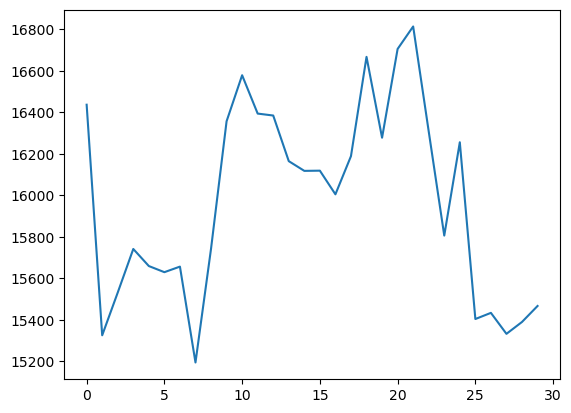

In [69]:
import matplotlib.pyplot as plt
idx = np.arange(0, 30)
plt.plot(idx, np.mean(ep_means_reshap, axis=1))

Ok so this looks more like a reasonable radar signal..

But for now we move on, knowing that the values in EP data are upto 65532; and that the mean is about 15000 in most timeframes. That could explain the division in the `cur_frame = torch.tensor(cur_frame).type(torch.float32)/1.255e5`. My intuition is that the current RF_model is trained on deflections of this maginitude and flavor; so have to look at the mean and std_dev of the `cur_frame` data after the said operation, and make the `cur_frame` in the Chiron data case match that distribution flavor.

### gen_rf_preds() breakdown

In [29]:
!pip install backports.datetime_fromisoformat

python(52293) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [30]:
import os
import pickle
import numpy as np
import torch
import argparse
# import imageio
from tqdm import tqdm

# from utils.eval_fusion_je import eval_fusion_model
# from utils.utils_je import pulse_rate_from_power_spectral_density, extract_video
# from data.datasets_je import FusionEvalDatasetObject, FusionRunDatasetObject
from rf import organizer as org
from rf.proc import create_fast_slow_matrix, find_range
# import matplotlib.pyplot as plt
import datetime

In [32]:
!pip install imageio

python(52326) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.4/315.4 kB 6.3 MB/s eta 0:00:00a 0:00:01


In [33]:
from fusion.model import FusionModel
from rgb.model import CNN3D
from rf.model import RF_conv_decoder
from utils.eval_fusion_je import eval_fusion_model
from utils.utils_je import pulse_rate_from_power_spectral_density, extract_video
from data.datasets_je import FusionEvalDatasetObject, FusionRunDatasetObject

All necessary imports are ready! Break down the full gen_rgb_preds() func and see how the shape change.

What happens with the EP data sample? (5min)

What happens with the Chiron data sample?